In [71]:
import numpy as np
import matplotlib.pyplot as plt

def calc_curve2(Vmax, Amax, J, V0=0, A0=0):
    t_reaching_Amax = np.roots([J,A0-Amax])[0]
    
    t = t_reaching_Amax
    v__t_reaching_Amax = V0 + A0*t + .5*J*t**2
    print('length', t_reaching_Amax, 'vmax', v__t_reaching_Amax)
    XT_t = [0]
    while XT_t[-1] < t_reaching_Amax :
        r = np.roots([J/6.0, A0/2.0,V0,-len(XT_t)])
        XT_t.append(np.real(r[-1]))
    #print(XT_t)
    
    
    #plt.plot(XT_t, range(len(XT_t)))
    delays = np.round(np.diff(XT_t)*1e6)
    delay_change = np.where(delays[:-1] != delays[1:])[0]+1
    curve = []
    for i in delay_change:
        print(int(delays[i-1]), i)
        curve.append(int(delays[i-1]))
        curve.append(i)
    print(int(delays[i-1]) - 1, 1)
    curve.append(int(delays[-1]))
    curve.append(1)
    print(curve)




z = calc_curve(
    Vmax=50 * 1000,
    Amax=30 * 1000,
    J=100 * 1000,
    V0=10 * 1000,
    A0=10 * 1000,
)

length 0.2 vmax 14000.0
100 49
99 143
98 233
97 319
96 402
95 484
94 564
93 642
92 720
91 797
90 873
89 949
88 1025
87 1101
86 1178
85 1254
84 1331
83 1409
82 1487
81 1566
80 1645
79 1726
78 1808
77 1891
76 1975
75 2061
74 2148
73 2236
72 2327
71 1
[100, 49, 99, 143, 98, 233, 97, 319, 96, 402, 95, 484, 94, 564, 93, 642, 92, 720, 91, 797, 90, 873, 89, 949, 88, 1025, 87, 1101, 86, 1178, 85, 1254, 84, 1331, 83, 1409, 82, 1487, 81, 1566, 80, 1645, 79, 1726, 78, 1808, 77, 1891, 76, 1975, 75, 2061, 74, 2148, 73, 2236, 72, 2327, 71, 1]


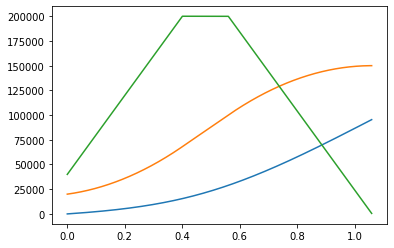

[[50, 102], [49, 189], [48, 190], [47, 193], [46, 182], [45, 196], [44, 184], [43, 203], [42, 186], [41, 206], [40, 216], [39, 211], [38, 229], [37, 228], [36, 237], [35, 258], [34, 271], [33, 275], [32, 301], [31, 310], [30, 338], [29, 355], [28, 384], [27, 423], [26, 432], [25, 486], [24, 524], [23, 583], [22, 645], [21, 680], [20, 808], [19, 854], [18, 1006], [17, 1134], [16, 1297], [15, 1529], [14, 1821], [13, 2318], [12, 2948], [11, 3781], [10, 5336], [9, 8199], [8, 16306], [7, 25083], [6, 13744]]


In [29]:
np.roots([[400000/6,40000/2,20000,-2], ])

ValueError: Input must be a rank-1 array.